摘自簡報說明：<br>
題目: 將Kaggle Dataset SMS文件以機器學習方式分辨是否為垃圾郵件<br>
說明：輸入文件spam.csv是一個至少有兩欄v1和v2的csv檔，v1註明該簡訊是ham還是spam，v2是sms內容本身，<br>
我們在讀入後先去掉不必要的欄位內容，將欄位名稱改為labels和data，再將labels內容改成0/1，0代表ham1代表spam。<br>
接著將內容切割成訓練集和測試集，再用tokenizer做前處理，最後形成可以分析的格式。<br>
建模分析之後我們印出訓練和測試準確度，然後以word cloud畫出spam和ham常用的字，<br>
再分別印出判斷錯誤的SMS供未來改進。<br>
延伸:可用不同的tokenizer，不同的ML分類器做改進準確率的比較。<br>
範例程式檔名: spam_sms_垃圾簡訊偵測器.py，以Naïve Bayes (MultinomialNB) 方式完成<br>
模組: sklearn, pandas, numpy, wordcloud<br>
輸入檔：spam(作業數據).csv<br>
成績：辨識百分率<br>
進一步說明：<br>
在這個習題中，我們從Kaggle下載SMS簡訊資料，經由前處理之後判斷是否為SPAM，並畫出垃圾字雲來<br>

以下是本習題要做的
1. 前處理：
  - 刪除不必要的欄位
  - 重新命名欄位
  - 二元數位化標記(labels)
  - 分為訓練與測試組
2. 特徵：可選用 Count or TF-IDF
3. 建模，訓練，印出
4. 列出判斷錯的

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud

資料來自：https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [2]:
df = pd.read_csv('spam(作業數據).csv', encoding='ISO-8859-1')

刪除不必要的欄位

In [3]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

重新命名欄位

In [4]:
df.columns = ['labels', 'data']

二元數位化標記(labels)

In [5]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

分為訓練與測試組

In [6]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

方法1:以TF-IDF為特徵

In [7]:
tfidf = TfidfVectorizer(decode_error='ignore', stop_words='english', max_features=1500)
Xtrain = tfidf.fit_transform(df_train)
Xtest = tfidf.transform(df_test)

方法2:以數量為特徵

In [8]:
# count_vectorizer = CountVectorizer(decode_error='ignore')
# Xtrain = count_vectorizer.fit_transform(df_train)
# Xtest = count_vectorizer.transform(df_test)

產生模型，訓練，印出

In [9]:
model = SVC(gamma=1, C=10)
model.fit(Xtrain, Ytrain)
print('train score:', model.score(Xtrain, Ytrain))
print('test score:', model.score(Xtest, Ytest))

train score: 0.999196356817573
test score: 0.9858618814573138


以wordcloud visualize數據

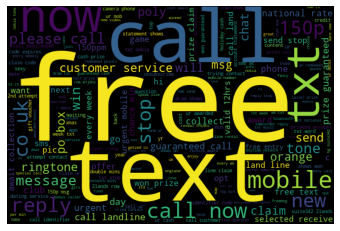

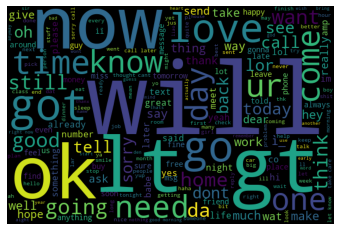

In [10]:
def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize('spam')
visualize('ham')

找出判斷錯誤的地方

In [11]:
X = tfidf.transform(df['data'])
df['predictions'] = model.predict(X)

沒預測出的SPAM

In [12]:
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
    print(msg)

Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES
XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIALE ZOUK WITH NICHOLS FROM PARIS.FREE ROSES 2 ALL LADIES !!! info: 07946746291/07880867867 
Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Filthy stories and GIRLS waiting for your
For sale - arsenal dartboard. Good condition but no doubles or trebles!
Bought one ringtone and now getting texts costing 3 pound offering more tones etc
0A$NETWORKS allow companies to bill for SMS, so they are responsible for their \suppliers\"
Hi if ur lookin 4 saucy daytime fun wiv busty married woman Am free all next week Chat now 2 so

以為是SPAM其實誤判

In [13]:
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
    print(msg)

Noice. Text me when you're here
These won't do. Have to move on to morphine
I liked the new mobile
